## Birthday Paradox

In [19]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import numpy as np
import random
import numba
from numba import jit
import time

random.seed(5140)

In [20]:
@jit
def birthday0(n):
    nums = set()
    k = 0
    num = 0
    while True:
        num = int(n*random.random())
        if num in nums:
            return k
        else:
            nums.add(num)
            k += 1

In [21]:
birthday0(5000)

132

In [4]:
m = 300
ks = np.empty(m)
for i in range(m):
    k = birthday0(5000)
    ks[i] = k 

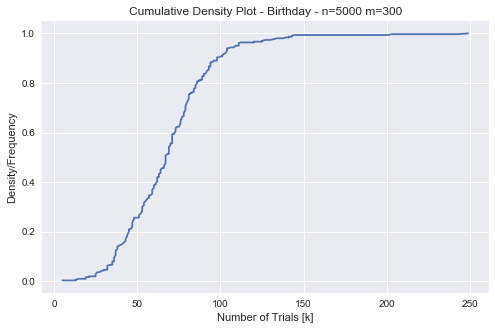

In [5]:
from scipy.stats import cumfreq

plt.figure(figsize=(8,5))
plt.plot(np.sort(ks), cumfreq(np.sort(ks), numbins=m)[0]/m)
plt.title('Cumulative Density Plot - Birthday - n=5000 m=300')
plt.ylabel('Density/Frequency')
plt.xlabel('Number of Trials [k]')
plt.margins(0.05)
plt.savefig('cumplot-birthday.png')

In [6]:
ks.mean()

90.69666666666667

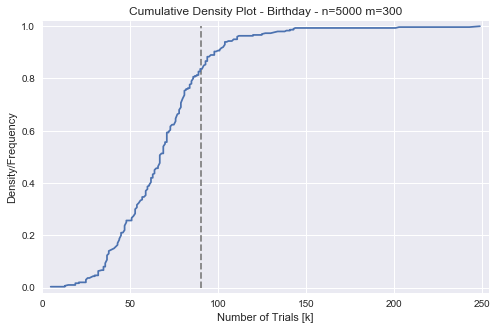

In [7]:
plt.figure(figsize=(8,5))
plt.plot(np.sort(ks), cumfreq(np.sort(ks), numbins=300)[0]/300)
plt.vlines(ks.mean(), 0, 1, label='Estimated Expected k', linestyles='--', colors='gray')
plt.title('Cumulative Density Plot - Birthday - n=5000 m=300')
plt.ylabel('Density/Frequency')
plt.xlabel('Number of Trials [k]')
plt.margins(0.02)
plt.savefig('cumplot-birthday2.png')

In [8]:
@jit
def birthday_experiment_loop(m, n):
    ks = np.empty(m)
    for i in range(m):
        k = birthday0(n)
        ks[i] = k


In [22]:
%timeit birthday_experiment_loop(300,5000)

974 µs ± 6.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
@jit(forceobj=True)
def runtime_test():
    ms = np.linspace(300,10000,3,dtype='int')
    ns = np.linspace(5000, 1000000, 50)

    runtimes = np.zeros((len(ms),len(ns)))

    for i, m in enumerate(ms):
        for j, n in enumerate(ns):
            start = time.time()
            birthday_experiment_loop(m,n)
            end = time.time()
            elapsed = end - start
            runtimes[i,j] = elapsed
    
    return runtimes

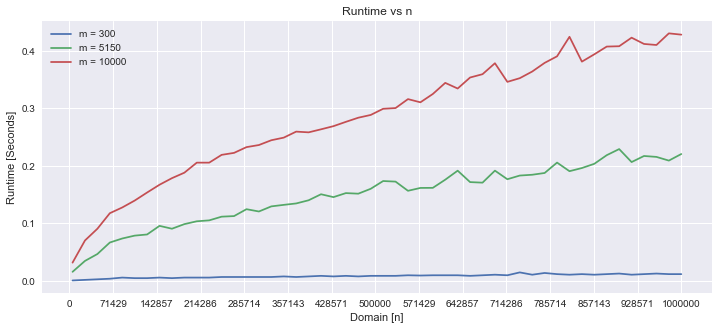

In [12]:
runtimes = runtime_test()
ms = np.linspace(300,10000,3,dtype='int')
ns = np.linspace(5000, 1000000, 50)

plt.figure(figsize=(12,5))
plt.plot(ns, runtimes[0,:], label='m = 300')
plt.plot(ns, runtimes[1,:], label='m = 5150')
plt.plot(ns, runtimes[2,:], label='m = 10000')
plt.xticks(np.linspace(0,1000000, 15))
plt.xlabel('Domain [n]')
plt.ylabel('Runtime [Seconds]')
plt.title('Runtime vs n')
plt.legend()
plt.savefig('birthday-runtime.png')